<a href="https://colab.research.google.com/github/elenamnivonh/Actividad_3ValoresAtipicos/blob/main/Act3_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#Carga de base de datos
data=pd.read_csv('ventas_limpieza.csv')
data.head(5)

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


In [64]:
#Corroboramos que no existan valores nulos
valores_nulos=data.isnull().sum().sum()
valores_nulos

0

In [65]:
#Realizamos las copias del data frame
data1=data.copy()
data2=data.copy()
data3=data.copy()
data4=data.copy()
data5=data.copy()
data6=data.copy()
data7=data.copy()
data8=data.copy()
data9=data.copy()
data10=data.copy()


##Tratamiento de Outliers

**Método de desviación estándar**

Columna ventas_precios_constantes

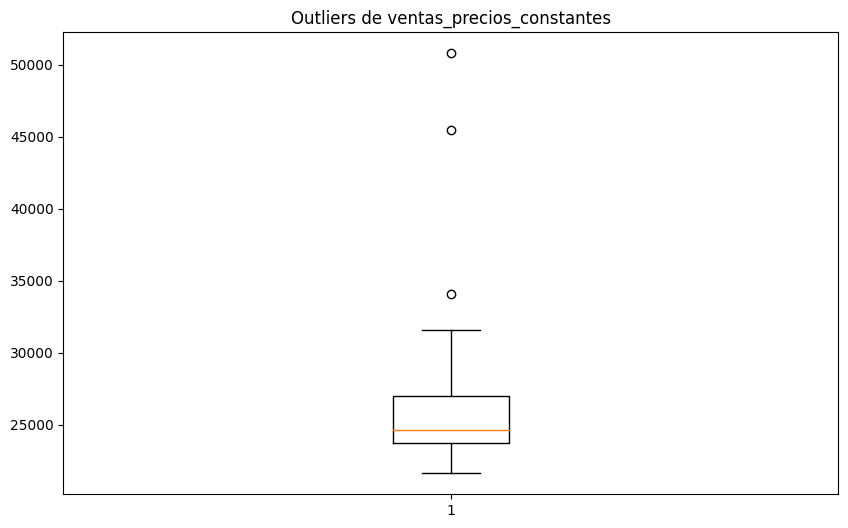

In [66]:
#Realizamos diagrama de caja o bigote
fig1=plt.figure(figsize=(10,6))
plt.boxplot(data["ventas_precios_constantes"])
plt.title("Outliers de ventas_precios_constantes")
plt.show()

In [67]:
vpc=data1["ventas_precios_constantes"]
Limite_superiorvpc= vpc.mean() + 3*vpc.std()
Limite_inferiorvpc= vpc.mean() - 3*vpc.std()
print("Limite superior permitido: ",Limite_superiorvpc)
print("Limite inferior permitido: ",Limite_inferiorvpc)

Limite superior permitido:  40022.90598479884
Limite inferior permitido:  12104.484784431932


In [68]:
#Encontramos Outliers
outliers_ventas_precios_constantes=data1[(vpc>Limite_superiorvpc)|(vpc<Limite_inferiorvpc)]
outliers_ventas_precios_constantes

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,46962602.22,46053650.13,...,37505172.62,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,21330213.29,3782646.219,1.218755e+07,1.343307e+07


In [69]:
#Obtenemos datos limpios
data_clean_ventas_precios_constante=data1[(vpc<=Limite_superiorvpc)&(vpc>=Limite_inferiorvpc)]
data_clean_ventas_precios_constante

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5.116431e+06,1.839832e+08,5.664003e+07,5.543219e+07,...,4.519991e+07,5.859939e+06,1.627522e+07,2.126505e+07,5.863701e+06,1.679029e+06,2.175394e+07,4.759533e+06,1.266927e+07,1.666512e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,1.191048e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.203960e+07,1.191048e+07


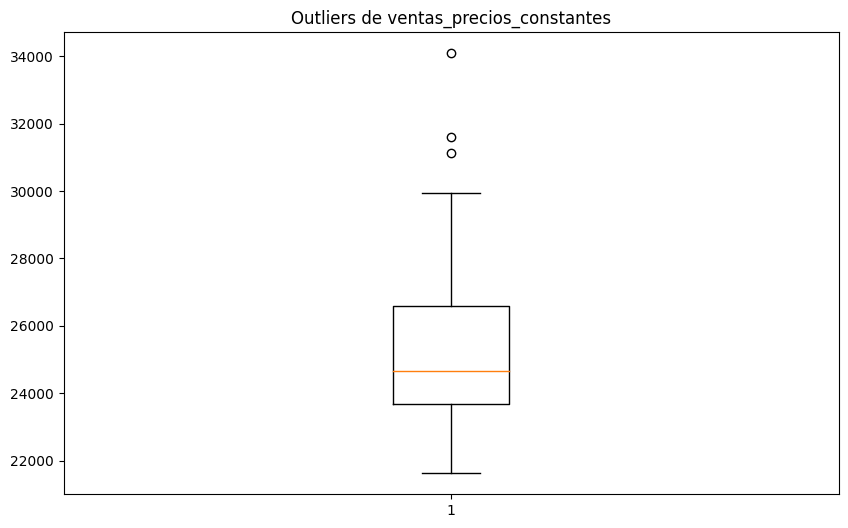

In [70]:
#Realizamos diagrama de caja o bigote
fig1_1=plt.figure(figsize=(10,6))
plt.boxplot(data_clean_ventas_precios_constante["ventas_precios_constantes"])
plt.title("Outliers de ventas_precios_constantes")
plt.show()

In [78]:
#Creamos el dataframe sin nulos en la columna ventas_precios_constantes
data_clean_ventas_precios_constante.to_csv('Clean_ventas_precios_constante.csv', index=False)

Columna ventas_totales_canal_venta

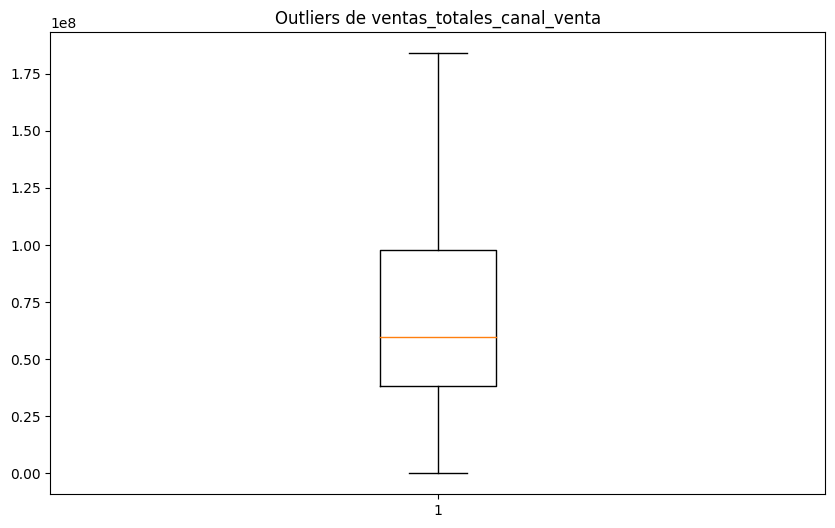

In [79]:
#Realizamos diagrama de caja o bigote
fig2=plt.figure(figsize=(10,6))
plt.boxplot(data["ventas_totales_canal_venta"])
plt.title("Outliers de ventas_totales_canal_venta")
plt.show()


In [80]:
vtcv=data2["ventas_totales_canal_venta"]
Limite_superiorvtcv= vtcv.mean() + 2*vtcv.std()
Limite_inferiorvtcv= vtcv.mean() - 2*vtcv.std()
print("Limite superior permitido: ",Limite_superiorvtcv)
print("Limite inferior permitido: ",Limite_inferiorvtcv)

Limite superior permitido:  162873291.87794593
Limite inferior permitido:  -15396493.210389912


In [81]:
#Encontramos Outliers
outliers_ventas_totales_canal_venta=data2[(vtcv>Limite_superiorvtcv)|(vtcv<Limite_inferiorvtcv)]
outliers_ventas_totales_canal_venta

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,11910475.62
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [83]:
#Obtenemos datos limpios
data_clean_ventas_totales_canal_venta=data2[(vtcv<=Limite_superiorvtcv)&(vtcv>=Limite_inferiorvtcv)]
data_clean_ventas_totales_canal_venta

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


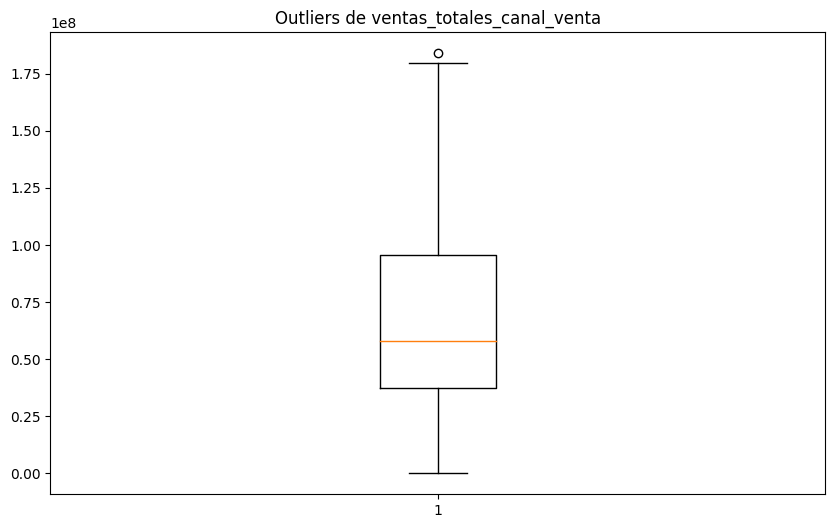

In [85]:
#Realizamos diagrama de caja o bigote
fig2_1=plt.figure(figsize=(10,6))
plt.boxplot(data_clean_ventas_precios_constante["ventas_totales_canal_venta"])
plt.title("Outliers de ventas_totales_canal_venta")
plt.show()

In [84]:
#Creamos el dataframe sin nulos en la columna ventas_totales_canal_venta
data_clean_ventas_totales_canal_venta.to_csv('Clean_ventas_totales_canal_venta.csv', index=False)

Columna ventas_totales_medio_pago

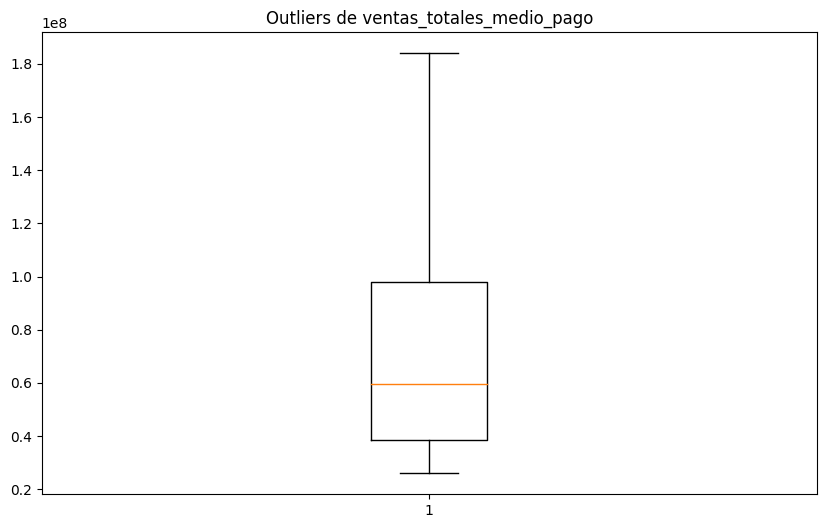

In [87]:
#Realizamos diagrama de caja o bigote
fig3=plt.figure(figsize=(10,6))
plt.boxplot(data["ventas_totales_medio_pago"])
plt.title("Outliers de ventas_totales_medio_pago")
plt.show()


In [90]:
vtmp=data2["ventas_totales_medio_pago"]
Limite_superiorvtmp= vtmp.mean() + 2*vtmp.std()
Limite_inferiorvtmp= vtmp.mean() - 2*vtmp.std()
print("Limite superior permitido: ",Limite_superiorvtmp)
print("Limite inferior permitido: ",Limite_inferiorvtmp)

Limite superior permitido:  162048081.32209474
Limite inferior permitido:  -13572021.115940869


In [91]:
#Encontramos Outliers
outliers_ventas_totales_medio_pago=data3[(vtmp>Limite_superiorvtmp)|(vtmp<Limite_inferiorvtmp)]
outliers_ventas_totales_medio_pago

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,11910475.62
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [92]:
#Obtenemos datos limpios
data_clean_ventas_totales_medio_pago=data3[(vtmp<=Limite_superiorvtmp)&(vtmp>=Limite_inferiorvtmp)]
data_clean_ventas_totales_medio_pago

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


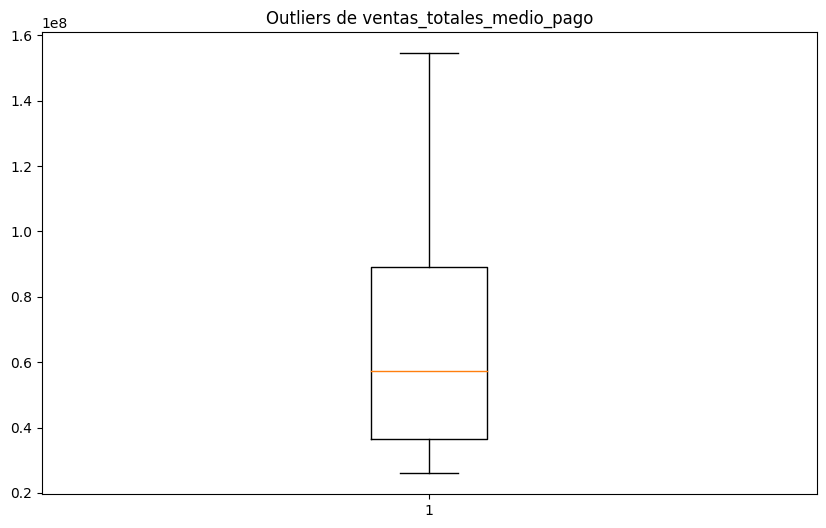

In [93]:
#Realizamos diagrama de caja o bigote
fig3_1=plt.figure(figsize=(10,6))
plt.boxplot(data_clean_ventas_totales_medio_pago["ventas_totales_medio_pago"])
plt.title("Outliers de ventas_totales_medio_pago")
plt.show()

In [94]:
#Creamos el dataframe sin nulos en la columna ventas_totales_medio_pago
data_clean_ventas_totales_medio_pago.to_csv('Clean_ventas_totales_medio_pago.csv', index=False)

Columna efectivo

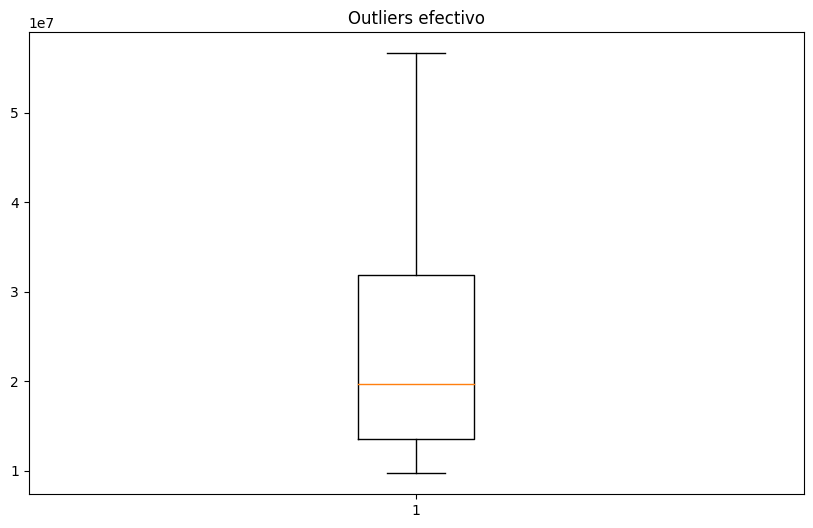

In [103]:
#Realizamos diagrama de caja o bigote
fig4=plt.figure(figsize=(10,6))
plt.boxplot(data["efectivo"])
plt.title("Outliers efectivo")
plt.show()


In [98]:
efectivo=data2["efectivo"]
Limite_superiorefectivo= efectivo.mean() + 2.5*efectivo.std()
Limite_inferiorefectivo= efectivo.mean() - 2.5*efectivo.std()
print("Limite superior permitido: ",Limite_superiorefectivo)
print("Limite inferior permitido: ",Limite_inferiorefectivo)

Limite superior permitido:  55557071.36550314
Limite inferior permitido:  -7988171.321780063


In [99]:
#Encontramos Outliers
outliers_efectivo=data4[(efectivo>Limite_superiorefectivo)|(efectivo<Limite_inferiorefectivo)]
outliers_efectivo

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [100]:
#Obtenemos datos limpios
data_clean_efectivo=data4[(efectivo<=Limite_superiorefectivo)&(efectivo>=Limite_inferiorefectivo)]
data_clean_efectivo

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,1.191048e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.203960e+07,1.191048e+07


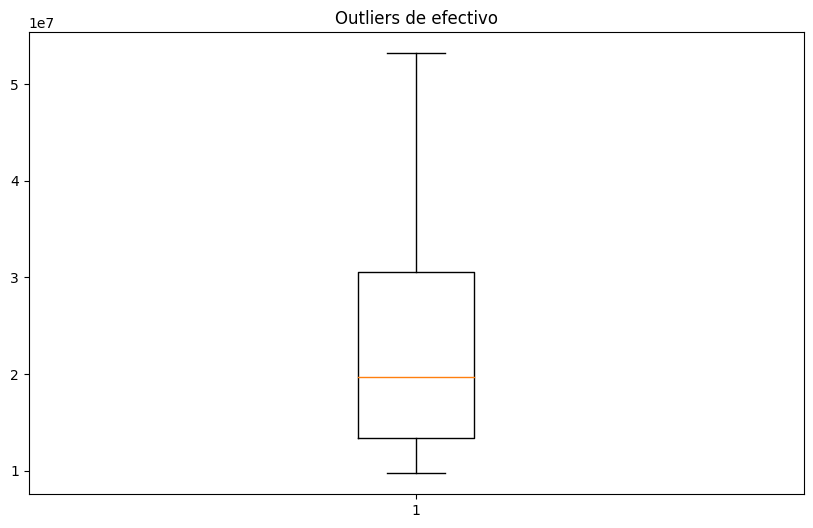

In [101]:
#Realizamos diagrama de caja o bigote
fig4_1=plt.figure(figsize=(10,6))
plt.boxplot(data_clean_efectivo["efectivo"])
plt.title("Outliers de efectivo")
plt.show()

In [102]:
#Creamos el dataframe sin nulos en la columna efectivo
data_clean_efectivo.to_csv('Clean_efectivo.csv', index=False)

Columna otros_medios

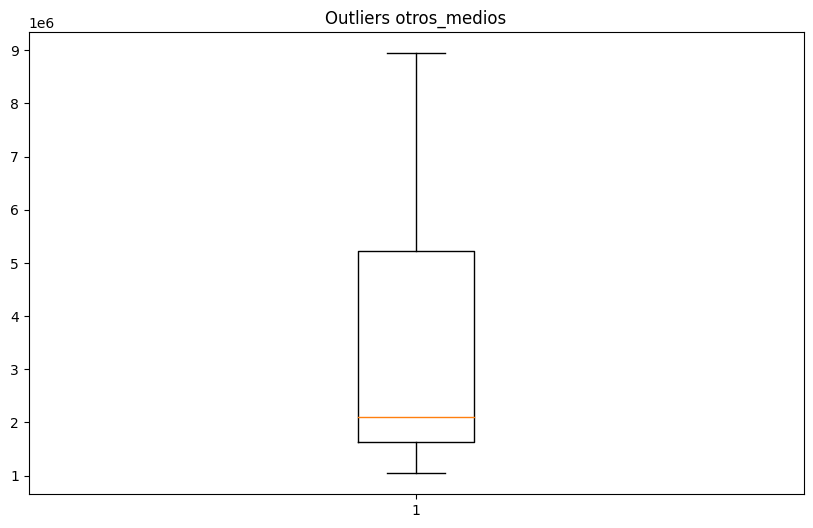

In [104]:
#Realizamos diagrama de caja o bigote
fig5=plt.figure(figsize=(10,6))
plt.boxplot(data["otros_medios"])
plt.title("Outliers otros_medios")
plt.show()

In [107]:
otrosmedios=data2["otros_medios"]
Limite_superiorotrosmedios= otrosmedios.mean() + 2*otrosmedios.std()
Limite_inferiorotrosmedios= otrosmedios.mean() - 2*otrosmedios.std()
print("Limite superior permitido: ",Limite_superiorotrosmedios)
print("Limite inferior permitido: ",Limite_inferiorotrosmedios)

Limite superior permitido:  8143103.96227223
Limite inferior permitido:  -1241480.9142106911


In [108]:
#Encontramos Outliers
outliers_otros_medios=data5[(otrosmedios>Limite_superiorotrosmedios)|(otrosmedios<Limite_inferiorotrosmedios)]
outliers_otros_medios

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [109]:
#Obtenemos datos limpios
data_clean_otros_medios=data5[(otrosmedios<=Limite_superiorotrosmedios)&(otrosmedios>=Limite_inferiorotrosmedios)]
data_clean_otros_medios

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,1.191048e+07


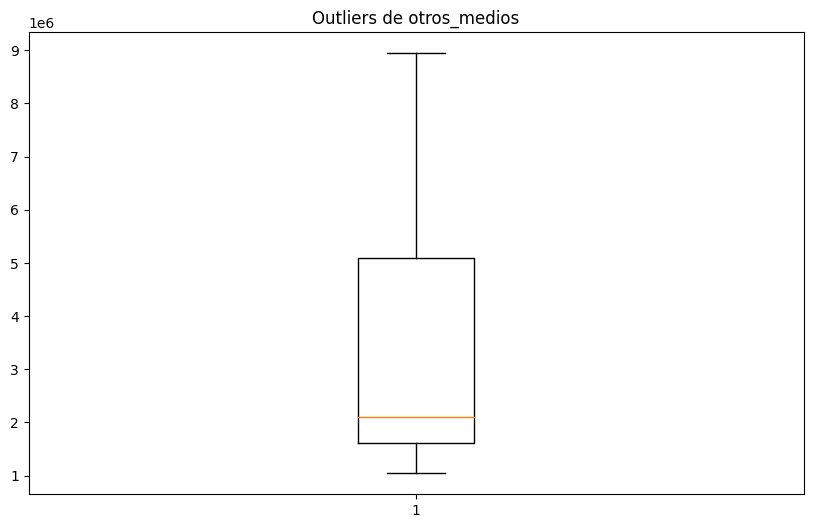

In [110]:
#Realizamos diagrama de caja o bigote
fig5_1=plt.figure(figsize=(10,6))
plt.boxplot(data_clean_efectivo["otros_medios"])
plt.title("Outliers de otros_medios")
plt.show()

In [111]:
#Creamos el dataframe sin nulos en la columna otros_medios
data_clean_otros_medios.to_csv('Clean_otros_medios.csv', index=False)

**Método de Rango Intercuartílico**

Columna subtotal_ventas_alimentos_bebidas

In [112]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data6["subtotal_ventas_alimentos_bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 114548006.925
Limite inferior permitido -11790048.954999998


In [113]:
#Encontramos Ouliers
outliers_subtotal_ventas_alimentos_bebidas= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_subtotal_ventas_alimentos_bebidas

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,11910475.62
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [117]:
#Obtenemos datos limpios
data_clean_subtotal_ventas_alimentos_bebidas= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_subtotal_ventas_alimentos_bebidas

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


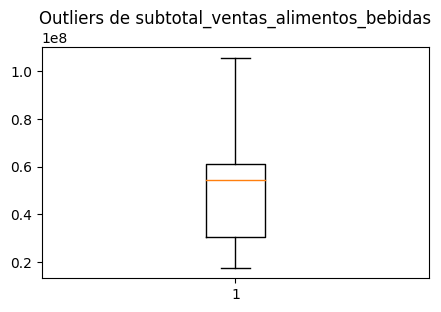

In [120]:
#Realizamos diagrama de caja o bigote
fig6_1= plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_subtotal_ventas_alimentos_bebidas["subtotal_ventas_alimentos_bebidas"])
plt.title("Outliers de subtotal_ventas_alimentos_bebidas")
plt.show() #dibujamos el diagrama

In [119]:
#Creamos el dataframe sin nulos en la columna subtotal_ventas_alimentos_bebidas
data_clean_subtotal_ventas_alimentos_bebidas.to_csv('Clean_subtotal_ventas_alimentos_bebidas.csv', index=False)

Columna bebidas

In [130]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data7["bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 22825184.4515
Limite inferior permitido -6724636.7525


In [131]:
#Encontramos Ouliers
outliers_bebidas= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_bebidas

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [132]:
#Obtenemos datos limpios
data_clean_bebidas= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_bebidas

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,1.191048e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.203960e+07,1.191048e+07


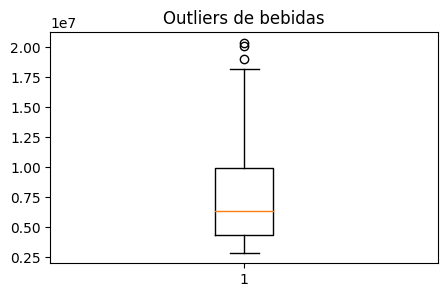

In [133]:
#Realizamos diagrama de caja o bigote
fig7_1= plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_subtotal_ventas_alimentos_bebidas["bebidas"])
plt.title("Outliers de bebidas")
plt.show() #dibujamos el diagrama

In [135]:
#Creamos el dataframe sin nulos en la columna bebidas
data_clean_bebidas.to_csv('Clean_bebidas.csv', index=False)

Columna panaderia

In [145]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data8["panaderia"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 5314390.465
Limite inferior permitido -928804.111


In [139]:
#Encontramos Ouliers
outliers_panaderia= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_panaderia

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,11910475.62
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [140]:
#Obtenemos datos limpios
data_clean_panaderia= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_panaderia

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


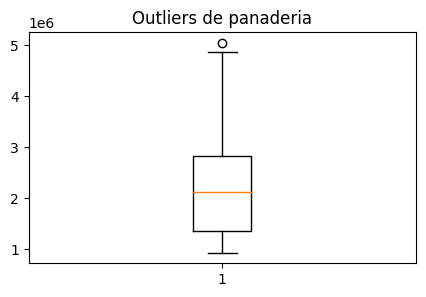

In [143]:
#Realizamos diagrama de caja o bigote
fig8_1= plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_subtotal_ventas_alimentos_bebidas["panaderia"])
plt.title("Outliers de panaderia")
plt.show() #dibujamos el diagrama

In [142]:
#Creamos el dataframe sin nulos en la columna bebidas
data_clean_panaderia.to_csv('Clean_panaderia.csv', index=False)

Columna lacteos

In [149]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data9["lacteos"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 19940661.0455
Limite inferior permitido -5569362.3025


In [148]:
#Encontramos Ouliers
outliers_lacteos= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_lacteos

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [150]:
#Obtenemos datos limpios
data_clean_lacteos= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_lacteos

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5.116431e+06,1.839832e+08,5.664003e+07,5.543219e+07,...,4.519991e+07,5.859939e+06,1.627522e+07,2.126505e+07,5.863701e+06,1.679029e+06,2.175394e+07,4.759533e+06,1.266927e+07,1.666512e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,1.191048e+07


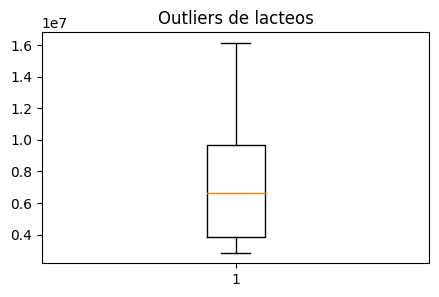

In [151]:
#Realizamos diagrama de caja o bigote
fig9_1= plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_subtotal_ventas_alimentos_bebidas["lacteos"])
plt.title("Outliers de lacteos")
plt.show() #dibujamos el diagrama

In [152]:
#Creamos el dataframe sin nulos en la columna bebidas
data_clean_lacteos.to_csv('Clean_lacteos.csv', index=False)

columna otros

In [154]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data10["otros"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 14100034.8925
Limite inferior permitido -3431469.0154999997


In [155]:
#Encontramos Ouliers
outliers_otros= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_otros

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [156]:
#Obtenemos datos limpios
data_clean_otros= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_otros

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,1.191048e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.203960e+07,1.191048e+07


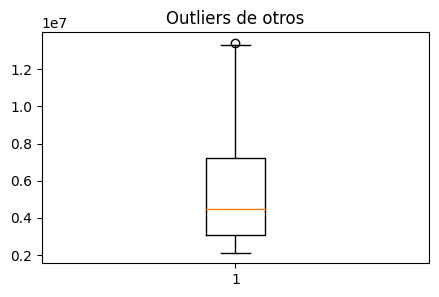

In [157]:
#Realizamos diagrama de caja o bigote
fig10_1= plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_subtotal_ventas_alimentos_bebidas["otros"])
plt.title("Outliers de otros")
plt.show() #dibujamos el diagrama

In [158]:
#Creamos el dataframe sin nulos en la columna bebidas
data_clean_otros.to_csv('Clean_otros.csv', index=False)